# PROJECT 2: BUSINESS PROCESS MINING (BPM)
* **COURSE:** CEI523 - ADVANCED TOPICS IN SOFTWARE ENGINEERING
* **STUDENTS:** Thomas Nikidiotis, Christos Christodoulou, Charalampos Charalampous
* **PROFESSOR:** DR. Andreas Andreou

In [4]:
import pm4py
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.objects.conversion.wf_net import converter as wf_net_converter
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.objects.conversion.process_tree import converter
import os
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualization
from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness_evaluator
from pm4py.algo.evaluation.precision import algorithm as precision_evaluator
from pm4py.algo.evaluation.generalization import algorithm as generalization_evaluator
from pm4py.algo.evaluation.simplicity import algorithm as simplicity_evaluator
from pm4py.algo.conformance.tokenreplay import algorithm as token_replay
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner

In [2]:
#log = pm4py.read_xes('ArtificialPatientTreatmentOriginal.xes')
log = xes_importer.apply('../data/ArtificialPatientTreatmentOriginal.xes')

In [3]:
for event in log[0]:
    print(event)

{'concept:name': ' First consult', 'org:resource': ' Dr. Anna', 'time:timestamp': datetime.datetime(2017, 1, 2, 11, 40, 11)}
{'concept:name': ' Blood test', 'org:resource': ' Lab', 'time:timestamp': datetime.datetime(2017, 1, 2, 12, 47, 33)}
{'concept:name': ' Physical test', 'org:resource': ' Nurse Jesse', 'time:timestamp': datetime.datetime(2017, 1, 2, 12, 53, 50)}
{'concept:name': ' Second consult', 'org:resource': ' Dr. Anna', 'time:timestamp': datetime.datetime(2017, 1, 2, 16, 21, 6)}
{'concept:name': ' Surgery', 'org:resource': ' Dr. Charlie', 'time:timestamp': datetime.datetime(2017, 1, 5, 13, 23, 9)}
{'concept:name': ' Final consult', 'org:resource': ' Dr. Ben', 'time:timestamp': datetime.datetime(2017, 1, 9, 8, 29, 28)}


## IMPORTANT: PARAPHRASE
The XES meta model shown in Fig. 4.7 does not prescribe a concrete syntax. In
principle many serializations are possible. However, to exchange XES documents,
a standard XML serialization is used. Figure 4.8 shows a fragment of the XES XML
serialization of the event log of Table 4.1. In the example XES log, three exten-
sions are declared: Concept, Time, and Organizational. For each of these extensions
a shorter prefix is given. These prefixes are used in the attribute names. For exam-
ple, the Time extension defines an attribute timestamp. As shown in Fig. 4.8, this
extension uses prefix time, therefore the timestamp of an event is stored using the
key time:timestamp.<br>
The example log in Fig. 4.8 specifies two lists of global attributes. Traces have
one global attribute: attribute concept:name is mandatory for all traces. Events have
three global attributes: attributes time:timestamp, concept:name and `org:resource`
are mandatory for all events.<br>
Three classifiers are defined in the XES log shown in Fig. 4.8. Classifier Activity
classifies events based on the concept:name attribute. Classifier Resource classifies
events based on the org:resource attribute. Classifier Both classifies events based on
two attributes: concept:name and org:resource. Recall that Definition 4.2 already
introduced the concept of a classifier: an event e ∈ E is classified as e. For example,
e = # resource (e) classifies events based on the resource executing the event.<br>

# QUESTION 1

* Here is the attributes that each trace has. We have the concept name which can be consult or a specific test or a surgery. 
* Then we have the time stapm which contains the data and time of the event and we have the org which is the actor of the event of consult or the test or the surgery
* In addition we have the name of the patient that the event exist for


In [4]:
df = pm4py.convert_to_dataframe(log)
print(len(log))
df.head()

101


,concept:name,org:resource,time:timestamp,case:concept:name
0,First consult,Dr. Anna,2017-01-02 11:40:11,patient 0
1,Blood test,Lab,2017-01-02 12:47:33,patient 0
2,Physical test,Nurse Jesse,2017-01-02 12:53:50,patient 0
3,Second consult,Dr. Anna,2017-01-02 16:21:06,patient 0
4,Surgery,Dr. Charlie,2017-01-05 13:23:09,patient 0


# QUESTION 2
Petrinet model of the process

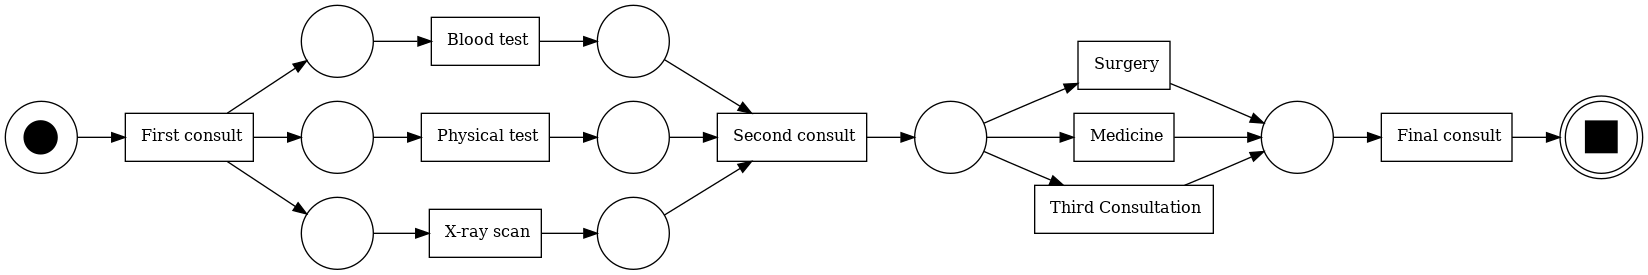

In [5]:
petri_net, initial_marking, final_marking = alpha_miner.apply(log)
graph = pn_visualizer.apply(petri_net, initial_marking, final_marking)
pn_visualizer.view(graph)

# QUESTION 3
Process TREE OF Question 2 tree and bpmn

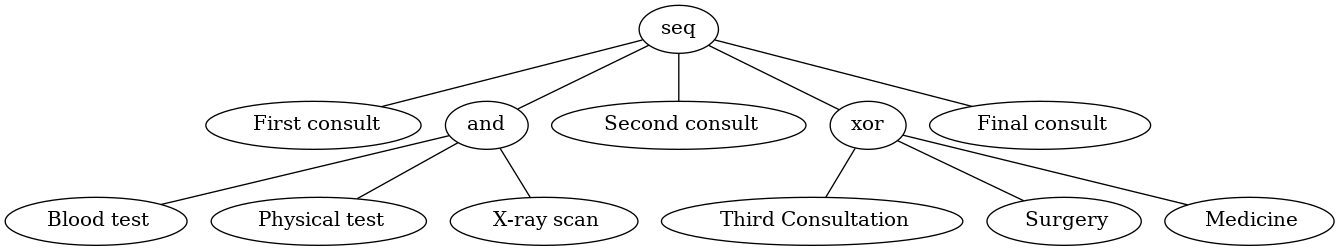

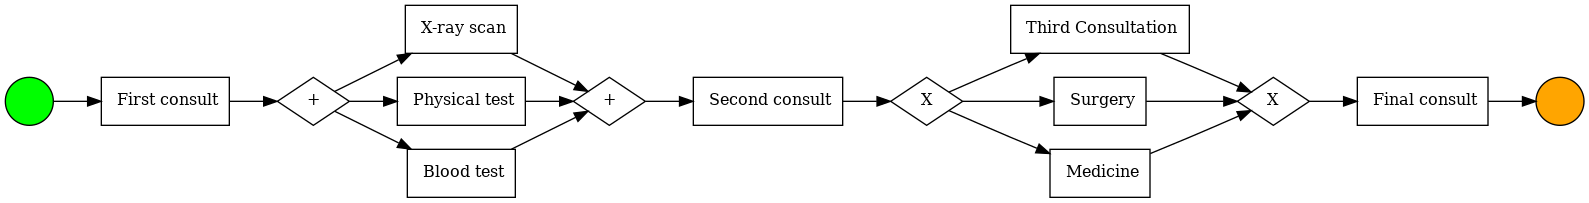

In [6]:
tree = wf_net_converter.apply(petri_net, initial_marking, final_marking)
gviz = pt_visualizer.apply(tree) #={pt_visualizer.Variants.WO_DECORATION.value.Parameters.FORMAT: "png"})
pt_visualizer.view(gviz)
bpmn_graph = converter.apply(tree, variant=converter.Variants.TO_BPMN)
pm4py.view_bpmn(bpmn_graph)

# Question 3 Observation: 
To bmpn mondelo pou paraxthike einai pio aploiko apo to petrinet kai vlepoume oti exei os arxi tou to first consult kai san telos tou to final consult sto endiameso exei ena and pou einai to (+) diladi prepei na ginoun kai ta 3: Xray scan, Physical test, Blood test meta paei sto second consult to apotelesma tis eisodou pou eixame prin kai me enta XOR diladi tha ginei ena apo ta 3 third consultion,surgery,medicine kai opos einai i eisodos etsi tha einai i e3odos diladi ena apo ta 3 gia na paei sto final consult kai na teleiwsei

# QUESTION 4

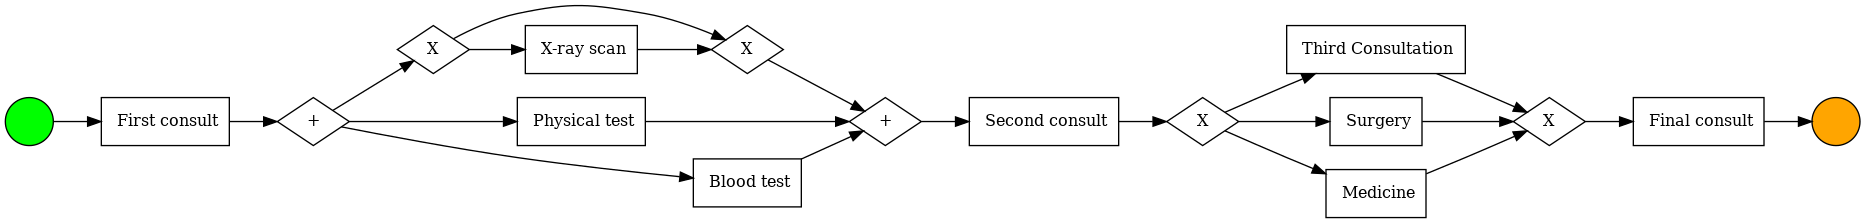

In [7]:
process_model = pm4py.discover_bpmn_inductive(log)
pm4py.view_bpmn(process_model)

# QUESTION 5
To the first bpmn we saw that the 3 states must be done to procees do the second consultation on the second bpmn which we construct it without the use of the process tree we observe that the physical test and the blood test must be done before going to the second conslutation and the X-ray scan can be done or not.
We think that this is due to the procees tree which all of the children must be done before levae the parent node. So in our log file we assume that there are traces which has all of the 3 : X-ray scan, blood test, physical test and some other has only the 2 of them and they dont contain the X-ray scan

# QUESTION 6
The 2 models are the same but we would prefer to use the BPMN model of the Question 3 because we can read it more easy

# Question 7

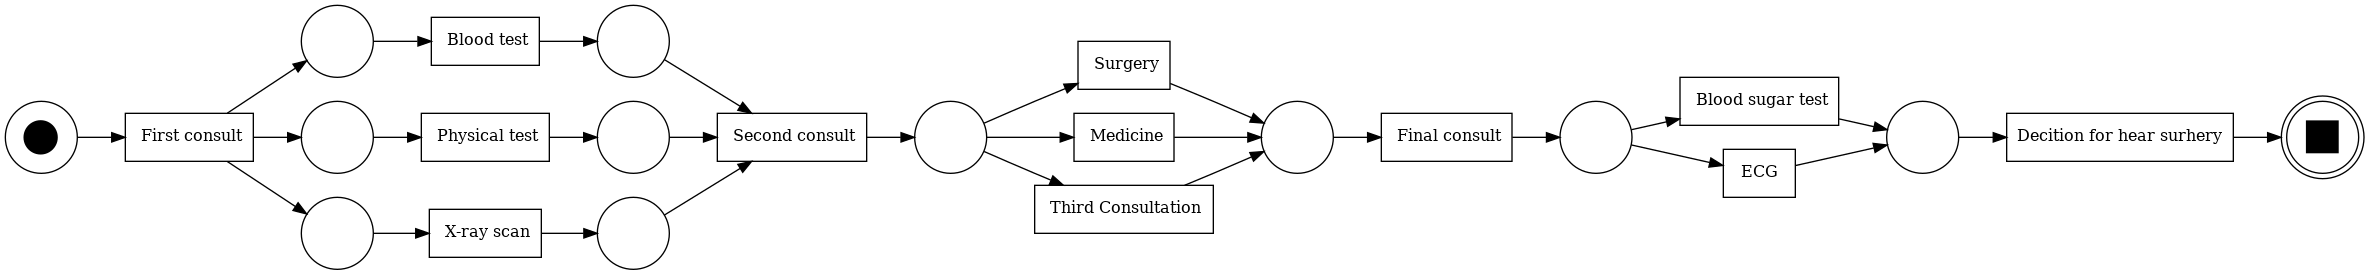

In [8]:
traces2 = pm4py.read_xes('../data/ArtificialPatientTreatmentOriginal_new.xes')
petri_net, initial_marking, final_marking = pm4py.discover_petri_net_alpha(traces2)
graph2 = pn_visualizer.apply(petri_net, initial_marking, final_marking)
pn_visualizer.view(graph2)

# Question 8

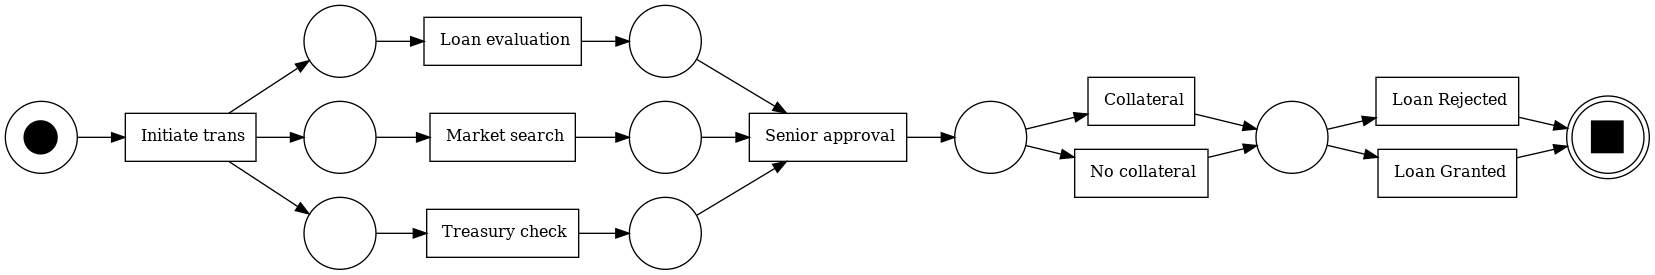

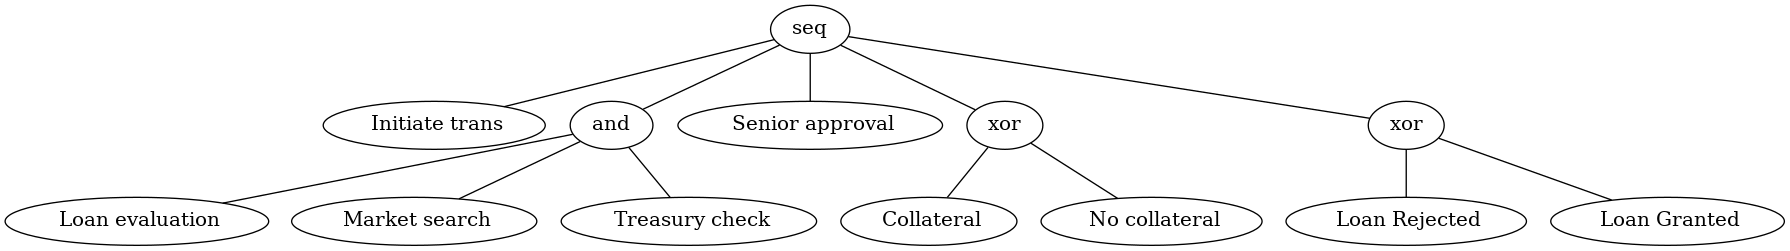

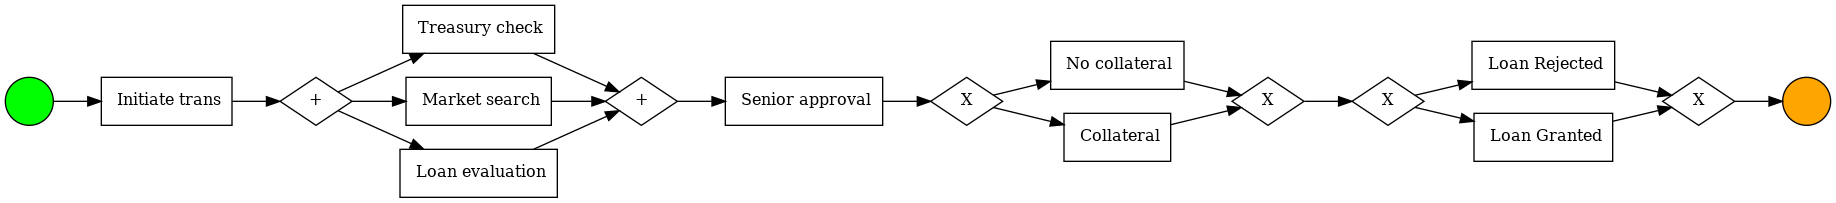

In [45]:

traces3 = pm4py.read_xes('../data/new.xes')
petri_8, initial_8, final_8 = pm4py.discover_petri_net_alpha(traces3)
graph2 = pn_visualizer.apply(petri_8, initial_8, final_8)
pn_visualizer.view(graph2)
tree2 = wf_net_converter.apply(petri_8, initial_8, final_8)
gviz2 = pt_visualizer.apply(tree2) #={pt_visualizer.Variants.WO_DECORATION.value.Parameters.FORMAT: "png"})
pt_visualizer.view(gviz2)
bpmn_graph2 = converter.apply(tree2, variant=converter.Variants.TO_BPMN)
pm4py.view_bpmn(bpmn_graph2)


# Question 9

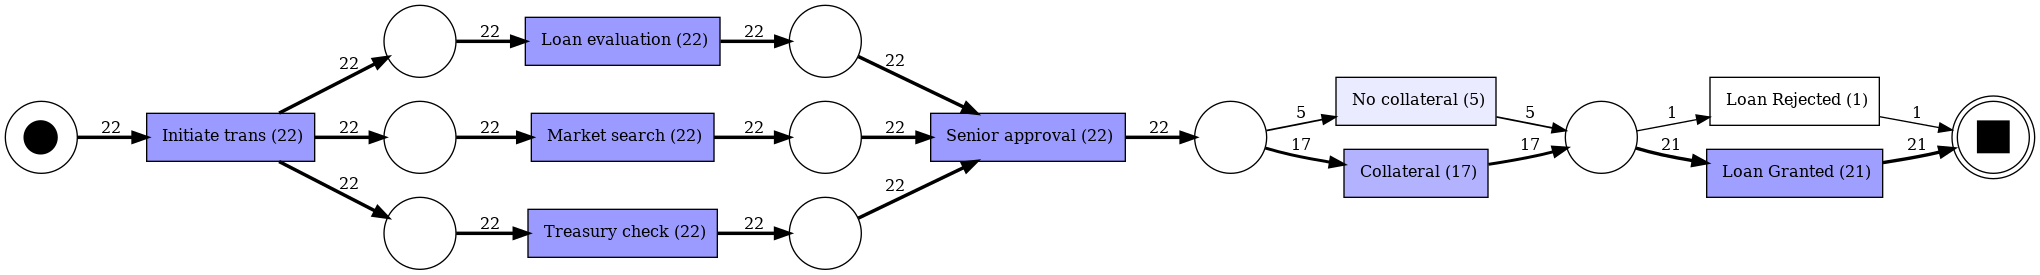

In [10]:
# d ={}
# for trace in traces3:
#     for event in trace:
#         if event['concept:name'] in d:
#             d[event['concept:name']] +=1
#         else:
#             d[event['concept:name']] =1

# print(d)
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(petri_8, initial_8, final_8, parameters=parameters, variant=pn_visualizer.Variants.FREQUENCY, log=traces3)
pn_visualizer.save(gviz, "inductive_frequency.png")
from IPython.display import display, Image
display(Image(filename='inductive_frequency.png'))

# Question 10

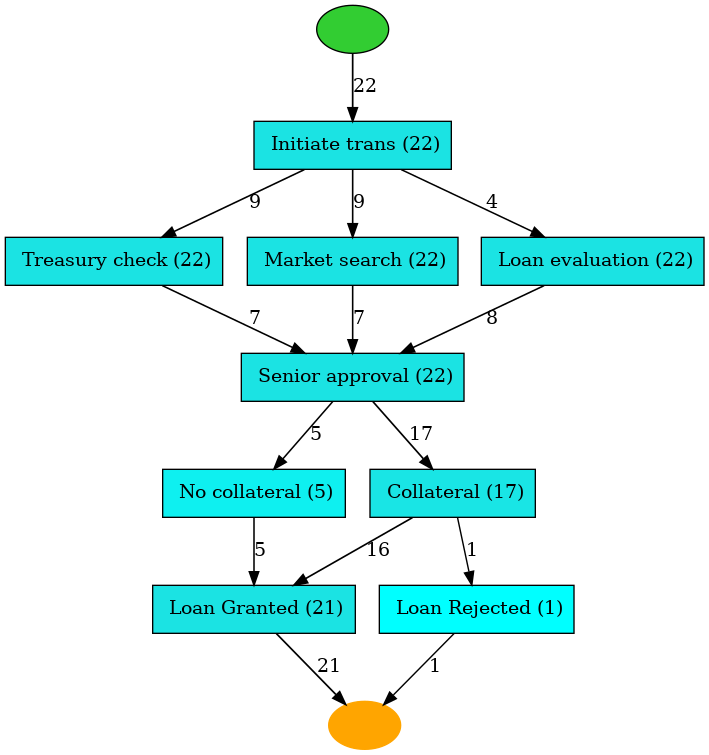

In [8]:
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
heu_net = heuristics_miner.apply_heu(log)
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)

# Explanation of the Question 10
* As we can see the number in the parenthesis of each state contains the number of times that the states presents in the log
* In addition we see that 22 are the traces which breaks to each path of states and we can see that the sum of each child state is the same and in number 22 and to the edges all the traces that goes from each state to others

# Question 11
1. Initiate State,Loan Evaluation, Market Search, Treasure Check, Senior Approval, No collateral, Loan Rejected
2. Initiate State,Loan Evaluation, Market Search, Treasure Check, Senior Approval, No collateral, Loan Granted
3. Initiate State,Loan Evaluation, Market Search, Treasure Check, Senior Approval, Collateral, Loan Rejected
4. Initiate State,Loan Evaluation, Market Search, Treasure Check, Senior Approval, Collateral, Loan Granted


In [12]:
# for 1):
d = {}
d['Initiate State'] = 1
d['Loan Evaluation'] = 1
d['Market Search'] = 1
d['Treasure Check'] = 1
d['Senior Approval'] = 1
d['No collateral'] = 1
d['Collateral'] = 0
d['Loan Rejected'] = 1
d['Loan Granted'] = 0
print(d)

# for 2):
d['Initiate State'] = 1
d['Loan Evaluation'] = 1
d['Market Search'] = 1
d['Treasure Check'] = 1
d['Senior Approval'] = 1
d['No collateral'] = 1
d['Collateral'] = 0
d['Loan Rejected'] = 0
d['Loan Granted'] = 1
print(d)

# for 3):
d['Initiate State'] = 1
d['Loan Evaluation'] = 1
d['Market Search'] = 1
d['Treasure Check'] = 1
d['Senior Approval'] = 1
d['No collateral'] = 0
d['Collateral'] = 1
d['Loan Rejected'] = 1 
d['Loan Granted'] = 0
print(d)

# for 4):
d['Initiate State'] = 1
d['Loan Evaluation'] = 1
d['Market Search'] = 1
d['Treasure Check'] = 1
d['Senior Approval'] = 1
d['No collateral'] = 0
d['Collateral'] = 1
d['Loan Rejected'] = 0 
d['Loan Granted'] = 1
print(d)

{'Initiate State': 1, 'Loan Evaluation': 1, 'Market Search': 1, 'Treasure Check': 1, 'Senior Approval': 1, 'No collateral': 1, 'Collateral': 0, 'Loan Rejected': 1, 'Loan Granted': 0}
{'Initiate State': 1, 'Loan Evaluation': 1, 'Market Search': 1, 'Treasure Check': 1, 'Senior Approval': 1, 'No collateral': 1, 'Collateral': 0, 'Loan Rejected': 0, 'Loan Granted': 1}
{'Initiate State': 1, 'Loan Evaluation': 1, 'Market Search': 1, 'Treasure Check': 1, 'Senior Approval': 1, 'No collateral': 0, 'Collateral': 1, 'Loan Rejected': 1, 'Loan Granted': 0}
{'Initiate State': 1, 'Loan Evaluation': 1, 'Market Search': 1, 'Treasure Check': 1, 'Senior Approval': 1, 'No collateral': 0, 'Collateral': 1, 'Loan Rejected': 0, 'Loan Granted': 1}


In [47]:
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
dfg = dfg_discovery.apply(log)
dfg

Counter({(' Initiate trans', ' Treasury check'): 5,
         (' Treasury check', ' Market search'): 5,
         (' Market search', ' Market evaluation'): 2,
         (' Market evaluation', ' Senior approval'): 2,
         (' Senior approval', ' Loan evaluation'): 5,
         (' Loan evaluation', ' No collateral'): 1,
         (' No collateral', ' Loan Granted'): 1,
         (' Loan evaluation', ' Collateral'): 4,
         (' Collateral', ' Loan Granted'): 4,
         (' Market search', ' Market analysis'): 3,
         (' Market analysis', ' Senior approval'): 3})

In [40]:
from pm4py.algo.conformance.tokenreplay import algorithm as token_replay
replayed_traces = token_replay.apply(log, petri_8, initial_8, final_8)
list_of_act_trans = []
for index, replay in enumerate(replayed_traces):
    list_of_act_trans.append(replay['activated_transitions'])
list_of_act_trans

[[ Initiate trans,
   Treasury check,
   Market search,
   Senior approval,
   Loan evaluation,
   No collateral,
   Loan Granted],
 [ Initiate trans,
   Treasury check,
   Market search,
   Senior approval,
   Loan evaluation,
   Collateral,
   Loan Granted],
 [ Initiate trans,
   Treasury check,
   Market search,
   Senior approval,
   Loan evaluation,
   Collateral,
   Loan Granted],
 [ Initiate trans,
   Treasury check,
   Market search,
   Senior approval,
   Loan evaluation,
   Collateral,
   Loan Granted],
 [ Initiate trans,
   Treasury check,
   Market search,
   Senior approval,
   Loan evaluation,
   Collateral,
   Loan Granted]]

In [41]:
unique_data = [list(x) for x in set(tuple(x) for x in list_of_act_trans)]

In [42]:
unique_data

[[ Initiate trans,
   Treasury check,
   Market search,
   Senior approval,
   Loan evaluation,
   Collateral,
   Loan Granted],
 [ Initiate trans,
   Treasury check,
   Market search,
   Senior approval,
   Loan evaluation,
   No collateral,
   Loan Granted]]

# Question 12 - code
##### With new_replay1.xes

In [28]:
log1 = pm4py.read_xes('../data/new_replay1.xes')
replay1 = token_replay.apply(log1, petri_8, initial_8, final_8)
fitness1 = replay_fitness_evaluator.apply(log1, petri_8, initial_8, final_8, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
print('Fitness for log1: ',fitness1)
prec1 = precision_evaluator.apply(log1, petri_8, initial_8, final_8, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Precision for log1: ',prec1)
gen1 = generalization_evaluator.apply(log1, petri_8, initial_8, final_8)
print('Generalization for log1: ',gen1)
simp1 = simplicity_evaluator.apply(petri_8)
print('Simplicity for log1: ',simp1)


Fitness for log1:  {'perc_fit_traces': 100.0, 'average_trace_fitness': 1.0, 'log_fitness': 1.0, 'percentage_of_fitting_traces': 100.0}



Precision for log1:  0.75



Generalization for log1:  0.44802904184712
Simplicity for log1:  0.7599999999999999


##### With new_replay2.xes

In [27]:
log2 = pm4py.read_xes('../data/new_replay2.xes')
replay2 = token_replay.apply(log2, petri_8, initial_8, final_8)
fitness2 = replay_fitness_evaluator.apply(log2, petri_8, initial_8, final_8, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
print('Fitness for log2: ',fitness2)
prec2 = precision_evaluator.apply(log2, petri_8, initial_8, final_8, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Precision for log2: ',prec2)
gen2 = generalization_evaluator.apply(log2, petri_8, initial_8, final_8)
print('Generalization for log2: ',gen2)
simp2 = simplicity_evaluator.apply(petri_8)
print('Simplicity for log2: ',simp2)


Fitness for log2:  {'perc_fit_traces': 60.0, 'average_trace_fitness': 0.9555555555555555, 'log_fitness': 0.9583333333333334, 'percentage_of_fitting_traces': 60.0}



Precision for log2:  0.8



Generalization for log2:  0.4335694114371569
Simplicity for log2:  0.7599999999999999


# Question 12-Analysis
* (Fitness) The purpose of the replay fitness is to see the ammount of our log which is acceptable by the model,as we see the first log is more acceptable and similar to our petri net model because it has 90% fitness instead of 85% of the second lowith the log of the petri net model in the Question 8 
* (Generalization) The purpose of the heneralization is to see how much the 2 logs much. The first log matches better than the second log but the two scores are low so none of the logs matches more than a half with the log of petrinet to the Question 8 (Simplicity) The purpose of the simg 
* (Precision) The purpose of the precision is to see how different is the two sets of traces, we see that the second log is more similar than the first log plicity is to see how simple is our petri net and is indepentant from the logs. We see that our petri net model has the same simplicity score for each log


# Question 13

Den akoloutheite i simperifora pou mas leei i askisi gia na akolouthithei tha prepei na valoume sta traces pou einai to Market evaluation to Senior approval ektos apo to loan evaluation pou exei

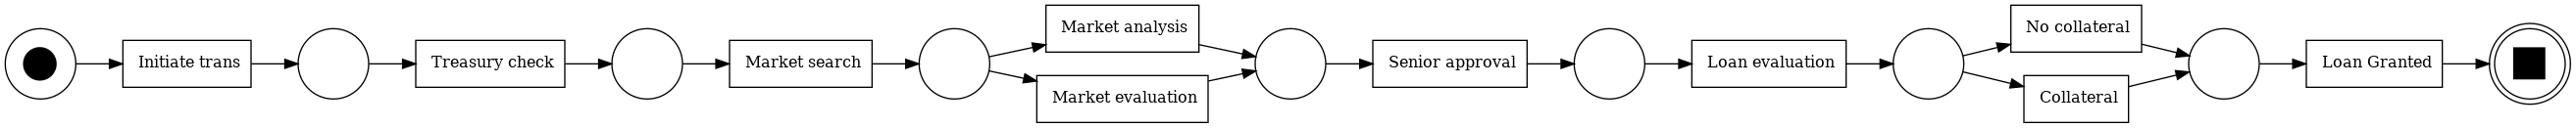

In [39]:
log = pm4py.read_xes('../data/new_final.xes')
petriNet, initialMarking, finalMarking = pm4py.discover_petri_net_alpha(log)
graph = pn_visualizer.apply(petriNet, initialMarking, finalMarking)
pn_visualizer.view(graph)

In [33]:
from pm4py.algo.conformance.tokenreplay import algorithm as token_replay
replayed_traces = token_replay.apply(log, petriNet, initialMarking, finalMarking)
list_of_act_trans = []
for index, replay in enumerate(replayed_traces):
    list_of_act_trans.append(replay['activated_transitions'])
    print(replay['activated_transitions'])
# list_of_act_trans


[ Initiate trans,  Treasury check,  Market search,  Market evaluation,  Loan evaluation,  Senior approval,  No collateral,  Loan Granted]
[ Initiate trans,  Market search,  Market evaluation,  Treasury check,  Loan evaluation,  Senior approval,  Collateral,  Loan Granted]
[ Initiate trans,  Market search,  Market analysis,  Loan evaluation,  Treasury check,  Senior approval,  Collateral,  Loan Granted]
[ Initiate trans,  Treasury check,  Loan evaluation,  Market search,  Market analysis,  Senior approval,  Collateral,  Loan Granted]
[ Initiate trans,  Treasury check,  Market search,  Market analysis,  Loan evaluation,  Senior approval,  Collateral,  Loan Granted]
